<h1> Predicting Life Expectancy using Python </h1>

<h3>Importing necessary libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8cee9fa581c74887b03c08b358c9ffd5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RPlY5E0dEovIrFiy11oQEg0OPgF5Kx90LNHAnU812cl6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8cee9fa581c74887b03c08b358c9ffd5.get_object(Bucket='predictinglifeexpectency-donotdelete-pr-vijmg0fixygoxi',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.drop("Country", axis = 1, inplace = True)

In [4]:
df.shape

(2938, 21)

In [5]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<h3>To find correlation between all parameters</h3>

In [6]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<h3> Heat Map of Correlation</h3>

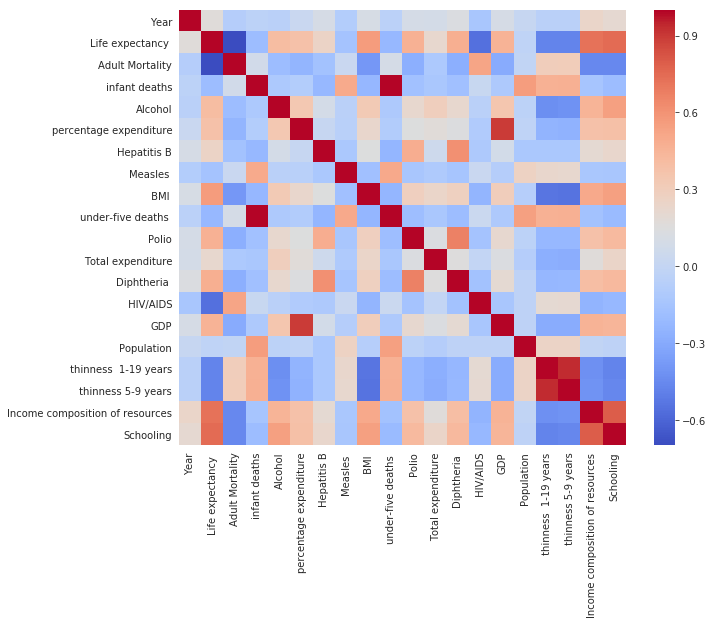

In [7]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
correlations=df.corr()
sns.heatmap(correlations, cmap='coolwarm')

<h3>To find out all NULL values and filling them with MEAN values</h3>

In [8]:
df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
# Life expectancy, Adult mortality, Alcohol, Hepatitis B, BMI
# Polio, Total expenditure, Diptheria, GDP, Population
# thinness (1-19), thinness (5-9) years
# Income composition of resources, Schooling
# The above columns have null values
# Replacing the null values with mean

In [10]:
df['Life expectancy '].fillna(df['Life expectancy '].mean(), inplace = True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace = True)
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace = True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace = True)
df[' BMI '].fillna(df[' BMI '].mean(),inplace = True)
df['Polio'].fillna(df['Polio'].mean(), inplace = True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace = True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(), inplace = True)
df['GDP'].fillna(df['GDP'].mean(), inplace = True)
df['Population'].fillna(df['Population'].mean(), inplace = True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(), inplace = True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(), inplace = True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace = True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace = True)


In [11]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

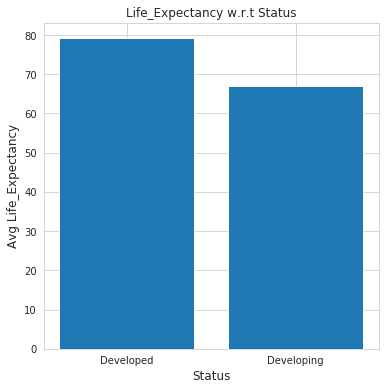

In [12]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life expectancy '].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

In [13]:
columns=df.columns
columns=list(columns)
columns.remove('Year')

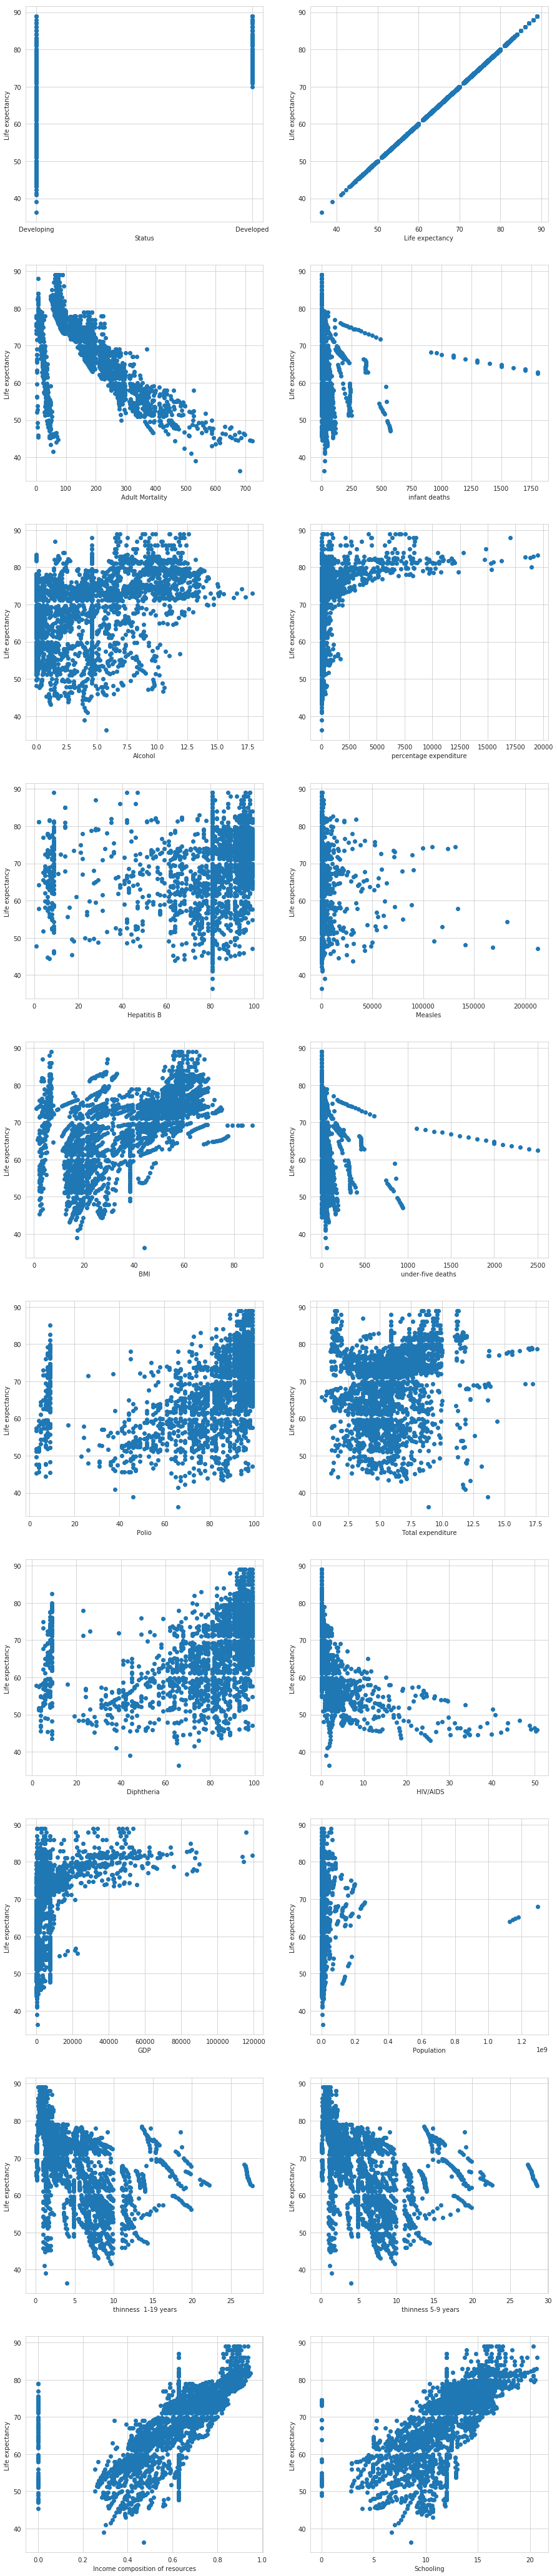

In [14]:
plt.figure(figsize=(15,75))
for i in range(len(columns)):
    plt.subplot(10,2,i+1)
    plt.scatter(df[columns[i]],df['Life expectancy '])
    plt.xlabel(columns[i])
    plt.ylabel('Life expectancy ')
plt.show()

In [15]:
y=df['Life expectancy ']
x=df.drop(labels='Life expectancy ',axis=1)

<h3>Applying Machine Learning Regression Algorithm</h3>

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x["Status"] = encoder.fit_transform(x["Status"])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
y_pred=lr.predict(x_test)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.8187027407149208

In [22]:
mean_squared_error(y_test,y_pred)

15.904269094681425

In [23]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-07-03 19:02:23,745 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [24]:
wml_credentials = {
  "apikey": "ZMaLapFQIccgyrvgeY06GHvKpWCa1l87ajLtoO0sbVQo",
  "iam_apikey_description": "Auto-generated for key b6dd6560-bca6-4346-a093-10e0e3f0055c",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/869874af67004df58bd47b7fda039e44::serviceid:ServiceId-c6b6c188-2f26-46a6-ac23-402509984a2f",
  "instance_id": "f65defd1-5f6c-4164-a5f1-a27cbd6c296f",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [25]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [26]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME: "Mohit Jain",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "mohitjain2502@gmail.com",
    client.repository.ModelMetaNames.NAME: "Life Expectancy Prediction"
    
}

In [27]:
store_data=client.repository.store_model(lr,meta_props=metadata)
store_data

{'metadata': {'guid': '4359ae45-fb60-4c31-94a1-b2d183bf6bfc',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/published_models/4359ae45-fb60-4c31-94a1-b2d183bf6bfc',
  'created_at': '2020-07-03T19:02:23.982Z',
  'modified_at': '2020-07-03T19:02:24.046Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/published_models/4359ae45-fb60-4c31-94a1-b2d183bf6bfc/learning_configuration',
  'author': {'name': 'Mohit Jain'},
  'name': 'Life Expectancy Prediction',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/published_models/4359ae45-fb60-4c31-94a1-b2d183bf6bfc/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/published_models/4359ae45-fb60-4c31-94a1-b2d183bf6bfc/feedback',
  'latest_versi

In [28]:
modeluid=client.repository.get_model_uid(store_data)

In [29]:
deploy=client.deployments.create(modeluid)



#######################################################################################

Synchronous deployment creation for uid: '4359ae45-fb60-4c31-94a1-b2d183bf6bfc' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='982db8f8-7a6e-48df-a51e-993f6597728b'
------------------------------------------------------------------------------------------------




In [30]:
deploy

{'metadata': {'guid': '982db8f8-7a6e-48df-a51e-993f6597728b',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/deployments/982db8f8-7a6e-48df-a51e-993f6597728b',
  'created_at': '2020-07-03T19:02:27.014Z',
  'modified_at': '2020-07-03T19:02:27.280Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Artifact deployment',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/deployments/982db8f8-7a6e-48df-a51e-993f6597728b/online',
  'deployable_asset': {'name': 'Life Expectancy Prediction',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/published_models/4359ae45-fb60-4c31-94a1-b2d183bf6bfc',
   'guid': '4359ae45-fb60-4c31-94a1-b2d183bf6bfc',
   'created_at': '2020-07-03T19:02:26.991Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.2

In [31]:
scoring_endpoints=client.deployments.get_scoring_url(deploy)

In [32]:
scoring_endpoints

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f65defd1-5f6c-4164-a5f1-a27cbd6c296f/deployments/982db8f8-7a6e-48df-a51e-993f6597728b/online'